In [329]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')

In [1375]:
class Unfolding:
    def __init__(self,t_=1,t=1):
        self.t_= t_
        self.t = t
        self.k = k = linspace(-pi/2,pi/2,50)
    def tb(self,k):
        t = self.t
        t_ = self.t_
        return array([[0,t+t_*exp(-2j*k)],[t+t_*exp(2j*k),0]])*(-1/2)
    def eig(self):
        val = []
        vec = []
        for i in range(len(self.k)):
            sol  = linalg.eig(self.tb(k[i]))
            val.append(sol[0])
            vec.append(sol[1])
        return (val,vec)    

In [1376]:
model = Unfolding(t_=1)
k = model.k
eig = model.eig()
val, vec  = eig
val = real(array(val).T)
# w = model.weight()

In [1377]:
w = array(
[
        conj(exp(-1j*k[i]*0)*vec[i][0]+exp(-1j*k[i]*1)*vec[i].T[1])*   
        (exp(-1j*k[i]*0)*vec[i][0]+exp(-1j*k[i]*1)*vec[i].T[1])  for i in range(len(k))
])

In [1378]:
w0 = array(
[
    conj(vec[i][0][0]+exp(-1j*k[i])*vec[i][0][1])*(vec[i][0][0]+exp(1j*k[i])*vec[i][0][1])
    for i in range(len(k))
])

In [1380]:
w1 = array(
[
    conj(vec[i][1][1]+exp(-1j*k[i])*vec[i][1][0])*(vec[i][1][1]+exp(1j*k[i])*vec[i][1][0])
    for i in range(len(k))
])

In [1381]:
real(w1)/2

array([ 7.85046229e-17,  4.10499309e-03,  1.63525685e-02,  1.13850125e-01,
       -9.46569680e-02,  2.07200704e-01,  6.82678704e-18,  1.88255099e-01,
       -1.24956918e-01, -1.79464045e-17, -1.20187162e-01,  4.20200052e-01,
       -1.05854170e-01,  6.44144755e-01,  6.11260467e-01,  7.46427391e-01,
        7.31269145e-01, -3.21936568e-17,  1.11970838e-17, -1.27222314e-17,
        9.19044052e-01,  0.00000000e+00, -1.54609074e-18,  9.90779578e-01,
        9.99229456e-01,  9.99229456e-01,  9.90779578e-01,  9.80854828e-01,
        0.00000000e+00, -1.98119003e-02,  8.80722979e-01,  1.28629475e-17,
       -5.02704882e-02,  7.31269145e-01,  2.56959348e-17,  6.11260467e-01,
        6.44144755e-01,  5.89828381e-01,  4.20200052e-01,  3.57736207e-01,
       -1.23963286e-01, -1.24956918e-01,  1.88255099e-01,  2.58046165e-01,
        2.07200704e-01,  1.58997616e-01, -7.73085037e-02,  7.21148651e-02,
        3.40876065e-02,  7.85046229e-17])

In [1382]:
abs(w0)/2

array([3.06161700e-17, 2.32207774e-16, 1.88971213e-16, 4.04420686e-01,
       6.26827292e-01, 3.42445891e-01, 3.75267005e-01, 3.53651106e-17,
       7.45358776e-01, 5.45534901e-01, 7.99055265e-01, 8.45374835e-17,
       8.47841275e-01, 1.29861001e-01, 4.89468318e-17, 8.99138727e-02,
       9.09994989e-17, 8.86599306e-01, 9.14412623e-01, 9.38468422e-01,
       2.30241752e-17, 9.74927912e-01, 9.87181783e-01, 7.59691576e-18,
       2.56891900e-04, 2.56891900e-04, 7.59691576e-18, 6.40910829e-03,
       9.74927912e-01, 9.79333927e-01, 3.03129798e-17, 9.14412623e-01,
       9.43299653e-01, 9.09994989e-17, 8.20172255e-01, 4.89468318e-17,
       1.29861001e-01, 1.52158725e-01, 0.00000000e+00, 1.13421042e-16,
       7.72767451e-01, 7.45358776e-01, 3.53651106e-17, 3.12366498e-01,
       3.42445891e-01, 3.73172708e-01, 5.95579314e-01, 4.36061419e-01,
       4.67964890e-01, 3.06161700e-17])

In [1308]:
w1 = array(
[
    (conj(vec[i][1])*vec[i][1])+exp(-1j*k[i])*conj(vec[i][0])*vec[i][1]
    for i in range(len(k))
])

In [1358]:
for i in range(20):
    print(abs(dot(conj(vec[i][0]),vec[i][1])))

0.0
5.721958498152797e-17
6.206335383118183e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
1.2412670766236366e-16
1.6653345369377348e-16
2.3551386880256624e-16
1.1102230246251565e-16
1.6883057536160649e-16
5.721958498152797e-17
5.551115123125783e-17
0.0
5.721958498152797e-17
1.8619006149354548e-16
5.551115123125783e-17
0.0
2.0014830212433605e-16
0.0


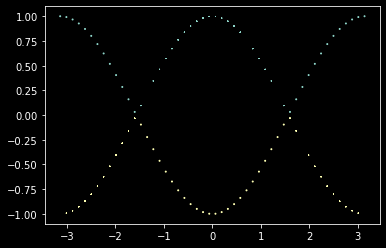

In [1361]:
plt.scatter(k,val[0],s=abs(w0).T[0])
plt.scatter(k,val[1],s=abs(w1).T[1])

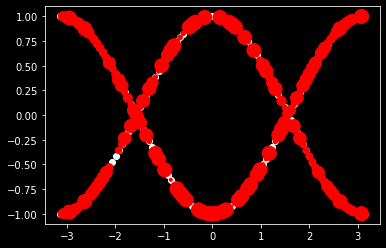

In [1161]:
# plt.plot(k,val)
plt.scatter(k,val[0],c="white")
plt.scatter(k,val[1],c="white")
plt.scatter(k,val[0],s=abs(w.T[0])*100,c="red")
plt.scatter(k,val[1],s=abs(w.T[1])*100,c="red")

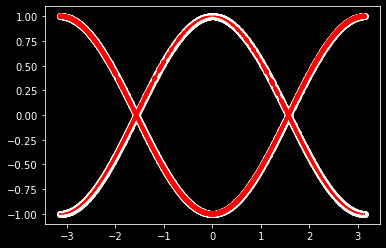

In [465]:
# plt.plot(k,val)
plt.scatter(k,val[0],c="white")
plt.scatter(k,val[1],c="white")
plt.scatter(k,val[0],s=abs(w).T[0]*10,c="red")
plt.scatter(k,val[1],s=abs(w**2).T[1]*10,c="red")

ValueError: s must be a scalar, or the same size as x and y

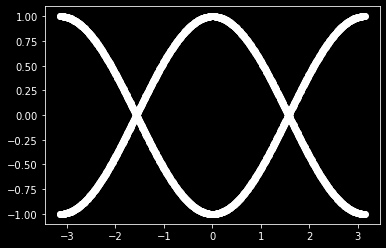

In [460]:
# plt.plot(k,val)
plt.scatter(k,val[0],c="white")
plt.scatter(k,val[1],c="white")
plt.scatter(k,val[0],s=w[0]*10,c="red")
plt.scatter(k,val[1],s=w[1]*10,c="red")